In [6]:
from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import preprocess
from validation import *
from plots import *

In [7]:
def train_model(y, x, l_rate, b_size, initial_w_dist):

        # (1) Pre-process
        y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

        print("Sanity check : n_variables = ", tx_train.shape[0], "n_features = ", tx_train.shape[1])

        # (2) Build k indices
        k_fold = 4  # using a default from the lab, can of course be tweaked
        seed = 1  # using a default from the lab, can of course be tweaked
        k_indices = build_k_indices(y_train, k_fold, seed)
        print(f"k-fold dimensions: {k_indices.shape[0]}, {k_indices.shape[1]}")

        # (3) Set up arrays in which the results of the k-fold will be stored
        acc_tr = []
        acc_te = []

        losses_tr = []
        losses_te = []

        clfiers = []

        for k in range(k_fold):
            test = k_indices[k]
            # print(f'k-test dimensions: {test.shape[0]}, {test.shape[1]}')
            train = []

            for i in range(len(k_indices)):
                if i is not k:
                    train.extend(k_indices[i])

            # (4) Get the train and test sets according to current k_index

            y_train_k = y_train[train]
            y_train_k = (y_train_k + 1) / 2
            y_test_k = y_train[test]
            y_test_k = (y_test_k + 1) / 2
            x_train_k = tx_train[train]
            x_test_k = tx_train[test]

            # (5) Compute clf
            clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma=l_rate,
                max_iterations=1800,
                min_max_iterations=300,
                w_sampling_distr=initial_w_dist,
                threshold=0,
            )

            # Batch size now -1, which results in batch_size = N, as using k-fold
            clf.train(
                y_train=y_train_k,
                tx_train=x_train_k,
                batch_size=b_size,
                verbose=True,
                tx_validation=x_test_k,
                y_validation=y_test_k,
                store_gradient=False,
                store_losses= True
            )

            acc_tr.append((clf.predict(x_train_k) == y_train_k).mean())
            acc_te.append((clf.predict(x_test_k) == y_test_k).mean())
            losses_tr.append(mse_loss(y_train_k, x_train_k, clf.w, clf.lambda_))
            losses_te.append(mse_loss(y_test_k, x_test_k, clf.w, clf.lambda_))
            clfiers.append(clf)

        return (
            acc_tr, 
            acc_te,
            losses_te, 
            losses_tr,
            clfiers
        )


In [8]:
tupla_risultati = train_model(y, x, 5-9, -1, 'uniform')

Sanity check : n_variables =  250000 n_features =  30
k-fold dimensions: 4, 62500


c:\Users\fabri\Documents\GitHub\ml_projects\project1\scripts\utils.py:30: RuntimeWarning: overflow encountered in exp
  return 1./ (1+ np.exp(-t))


Current iteration=0, loss=0.3438293333333333


KeyboardInterrupt: 

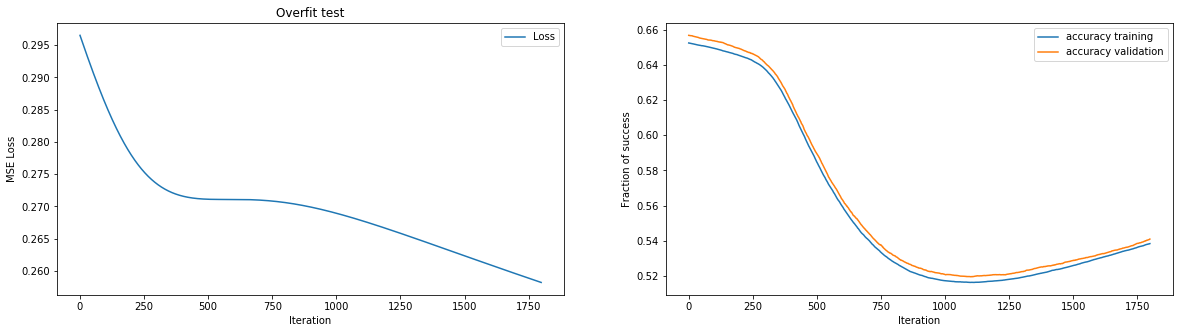

In [ ]:
selector = 0
training_plots(tupla_risultati[-1][selector])
selector += 1

In [ ]:
#load the goddamn data
y, x, ids_train = load_csv_data('../data/train.csv')
y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

#split the data into train and test:
x_train, y_train, x_test, y_test = split_data(tx_train, y_train, 0.8, verbose=True, )
y_train = (y_train + 1)/2.
y_test = (y_test + 1)/2.
print('x_train, x_test:', x_train.shape, y_test.shape)
print('y_train, y_test:', y_train.shape, y_test.shape)
print('values of y_train', 'values of y_test', set(y_train), set(y_test))

# Finding a good gamma: 1e-6
That the loglikelihood and the mse loss actually do the same thing (rescaled). 
But the loglikelihood tales a lot more time to compute so better use mse.

In [9]:
clf1 = ClassifierLogisticRegression(
        lambda_=0,
        regularizer=None,
        gamma= 1e-6,
        max_iterations=10000,
        min_max_iterations = 300,
        w_sampling_distr='zero',
        threshold=1e-6,
    )
clf1.train(y_train, x_train, 
        batch_size=-1, 
        verbose = True, 
        tx_validation = x_test, 
        y_validation = y_test, 
        store_gradient=True, 
        store_losses=True,
        normalize_gradient = True)

Current iteration=0, loss=0.22135143399188914
Current iteration=100, loss=0.20521750216754236
Current iteration=200, loss=0.2026426411046962
Current iteration=300, loss=0.20101042384437506
Current iteration=400, loss=0.19973600318379933
Current iteration=500, loss=0.19864056701633434
Current iteration=600, loss=0.19765417536014937
Current iteration=700, loss=0.19674560168786975
Current iteration=800, loss=0.19589907620334296
Current iteration=900, loss=0.1951055056725147
Current iteration=1000, loss=0.19435888899714893
Current iteration=1100, loss=0.19365477022353225
Current iteration=1200, loss=0.19298954119224546
Current iteration=1300, loss=0.19236011449338267
Current iteration=1400, loss=0.19176376298030803
Current iteration=1500, loss=0.19119803594535945
Current iteration=1600, loss=0.19066071127069273
Current iteration=1700, loss=0.1901497648372283
Current iteration=1800, loss=0.18966334849921218
Current iteration=1900, loss=0.18919977256810544
Current iteration=2000, loss=0.1887

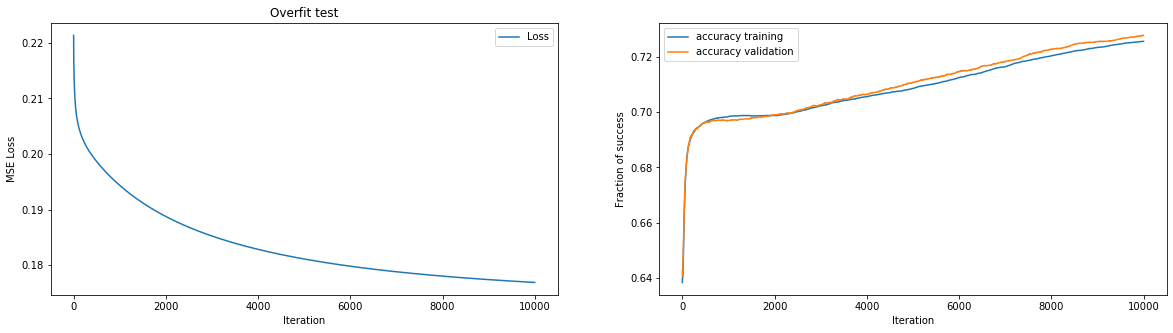

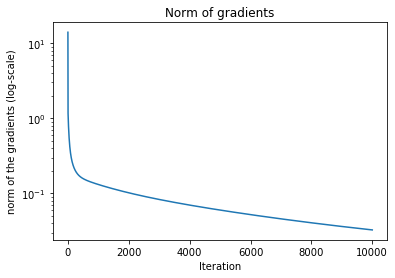

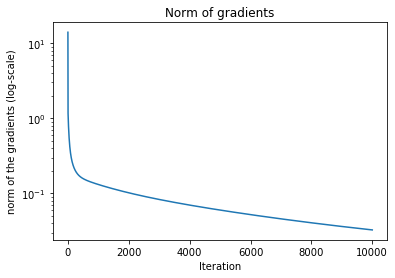

In [10]:
training_plots(clf1, show_gradient=True)
fig = plt.figure()
plt.plot(clf1.params['stored_gradients'])
plt.yscale('log')
plt.ylabel('norm of the gradients (log-scale)')
plt.xlabel('Iteration')
plt.title('Norm of gradients')
plt.show()

# Narrowing the gamma range
The following is just to narrow the range of values to search with a numerical instability arguments.
The best way is to look at values around 1e-6. Maybe higher values of gamma are possible

Current iteration=0, loss=0.22195458193556608
Current iteration=100, loss=0.20777353021093165
Current iteration=0, loss=0.24924290462229823
Current iteration=100, loss=0.2239051283022402
Current iteration=0, loss=0.26946071753504575
Current iteration=100, loss=0.2755994834626029
Current iteration=0, loss=0.2780958364147327
Current iteration=100, loss=0.2533763420808887


<Figure size 432x288 with 0 Axes>

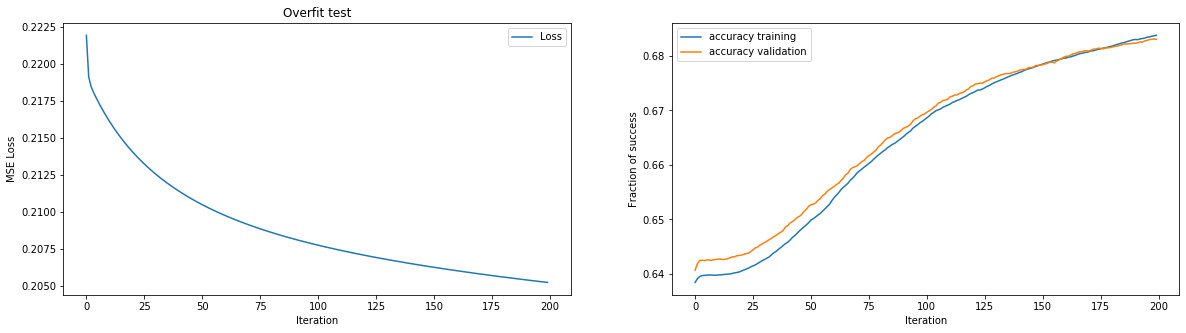

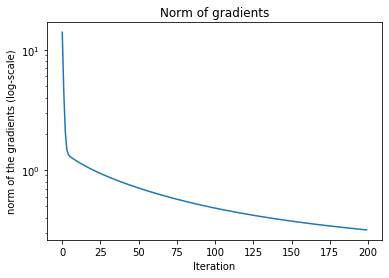

<Figure size 432x288 with 0 Axes>

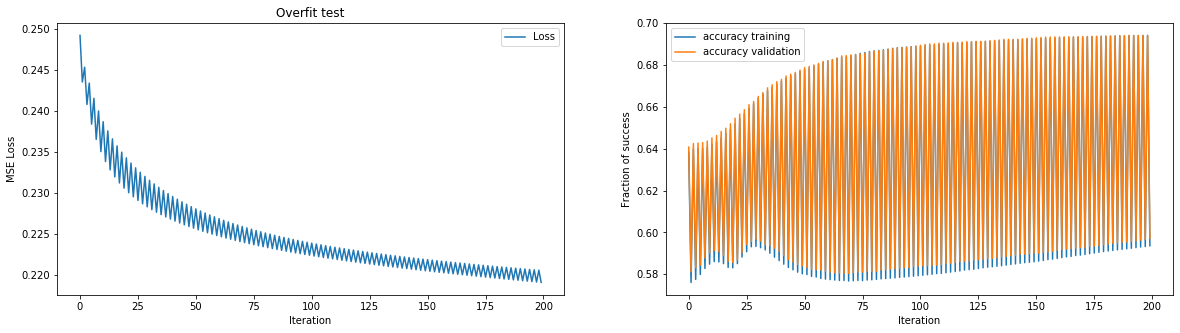

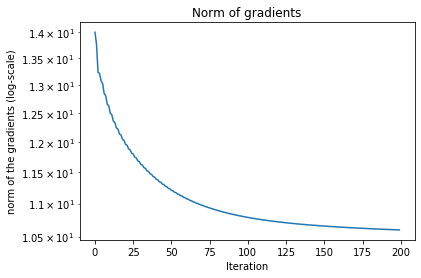

<Figure size 432x288 with 0 Axes>

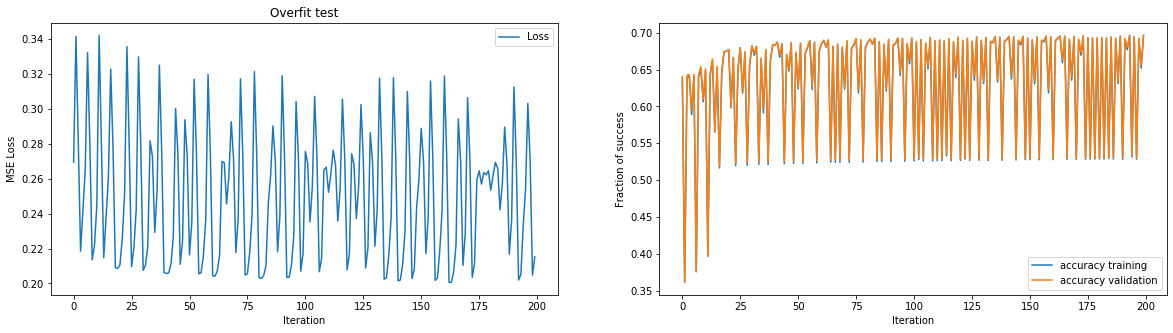

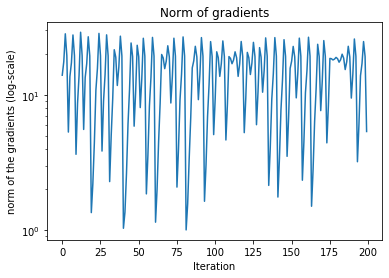

<Figure size 432x288 with 0 Axes>

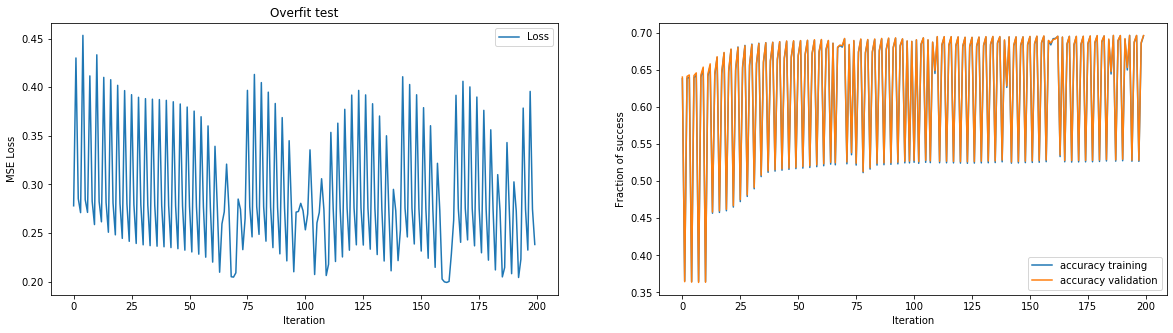

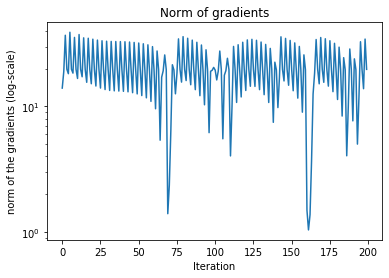

In [13]:
#Gammas bigger than 1e-6
gammas = [0.5e-6, 2e-6, 3e-6, 4e-6]
clfiers = []
for gamma in gammas:
    clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= gamma,
            max_iterations=200,
            min_max_iterations = 300,
            w_sampling_distr='zero',
            threshold=1e-6,
        )
    clf.train(y_train, x_train, 
            batch_size=-1, 
            verbose = True, 
            tx_validation = x_test, 
            y_validation = y_test, 
            store_gradient=True, 
            store_losses=True,
            normalize_gradient = True)
    clfiers += [clf]

#plotting stuff
for c in clfiers:
    fig = plt.figure()
    training_plots(c, show_gradient=True)

Current iteration=0, loss=0.21990595115867226
Current iteration=100, loss=0.20560135338846355
Current iteration=0, loss=0.21911542934951728
Current iteration=100, loss=0.20603009569679395
Current iteration=0, loss=0.21910929851067643
Current iteration=100, loss=0.20651789906094464
Current iteration=0, loss=0.22001552760711635
Current iteration=100, loss=0.2070869078739692


<Figure size 432x288 with 0 Axes>

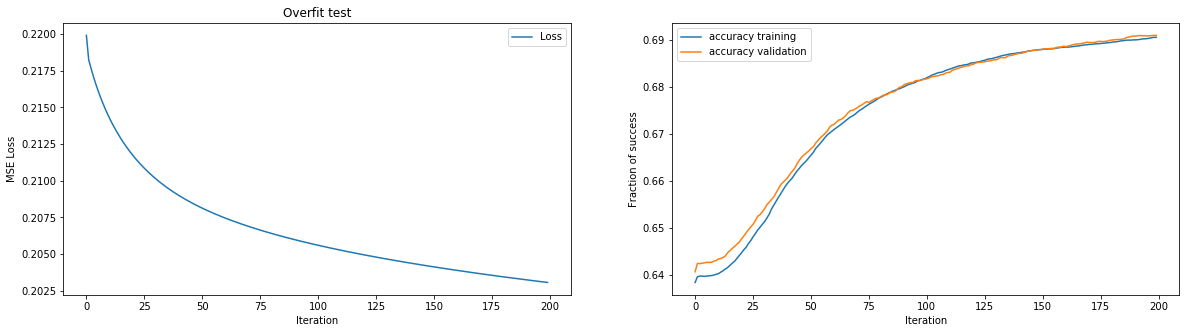

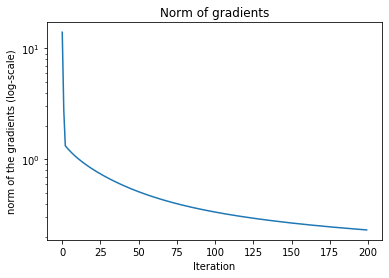

<Figure size 432x288 with 0 Axes>

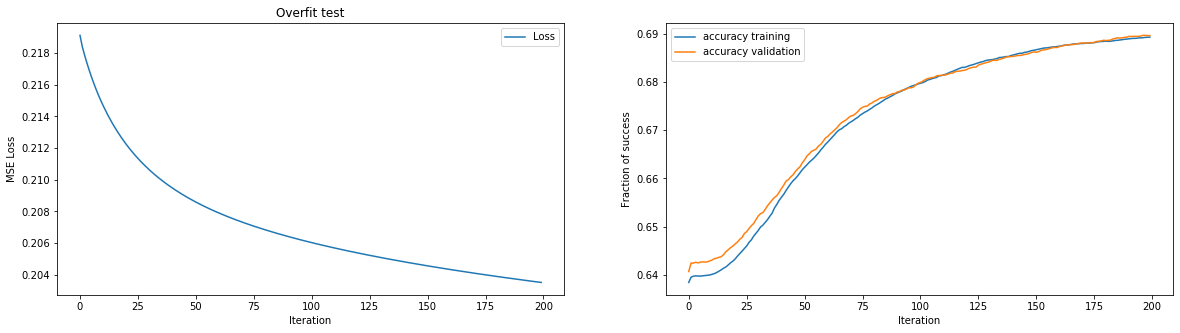

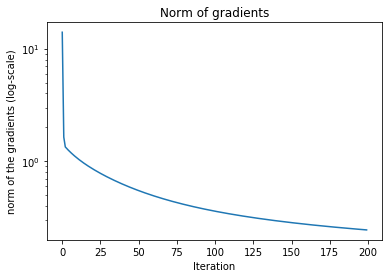

<Figure size 432x288 with 0 Axes>

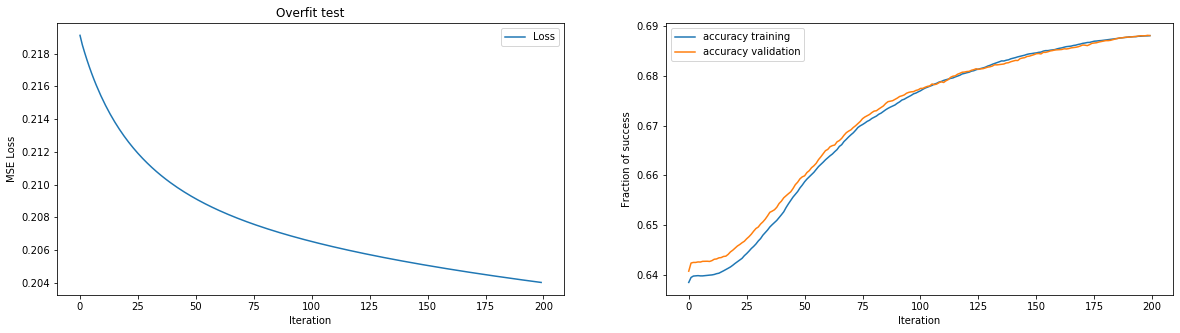

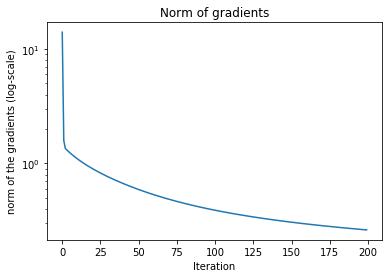

<Figure size 432x288 with 0 Axes>

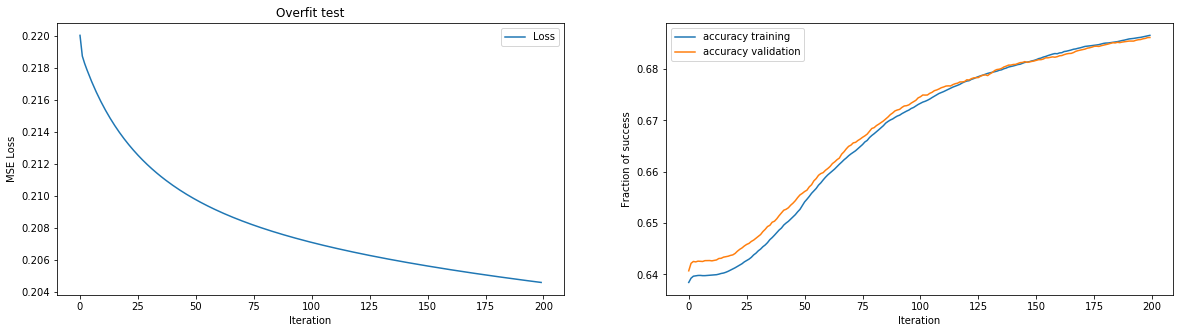

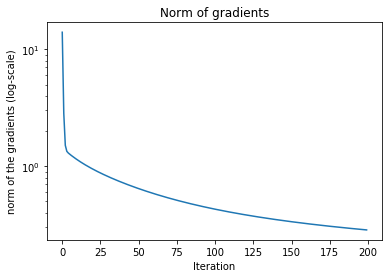

In [14]:
#Gammas smaller than 1e-6
gammas = [9e-7, 8e-7, 7e-7, 6e-7]
clfiers = []
for gamma in gammas:
    clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= gamma,
            max_iterations=200,
            min_max_iterations = 300,
            w_sampling_distr='zero',
            threshold=1e-6,
        )
    clf.train(y_train, x_train, 
            batch_size=-1, 
            verbose = True, 
            tx_validation = x_test, 
            y_validation = y_test, 
            store_gradient=True, 
            store_losses=True,
            normalize_gradient = True)
    clfiers += [clf]

#plotting stuff
for c in clfiers:
    fig = plt.figure()
    training_plots(c, show_gradient=True)


# Speed up training: using batches:
Batches speed training up quite a bit. What it the best range to do this ? 

Current iteration=0, loss=1.7364251375260564
Current iteration=100, loss=1.566939870565921
Current iteration=200, loss=1.525114676690788
Current iteration=300, loss=1.4972712219667526
Current iteration=400, loss=1.47746270263725
Current iteration=500, loss=1.4626799125898242
Current iteration=600, loss=1.4512725125286328
Current iteration=700, loss=1.442256921529114
Current iteration=800, loss=1.4350032116021523
Current iteration=900, loss=1.4290834032701498
Current iteration=1000, loss=1.4241914205005652
Current iteration=1100, loss=1.4201019574150797
Current iteration=1200, loss=1.4166479431003247
Current iteration=1300, loss=1.4137039130116038
Current iteration=1400, loss=1.4111738157375058
Current iteration=1500, loss=1.4089829083189604
Current iteration=1600, loss=1.4070723279149713
Current iteration=1700, loss=1.4053952754322319
Current iteration=1800, loss=1.4039142328797352
Current iteration=1900, loss=1.4025988910135687
Current iteration=2000, loss=1.401424585391807
Current it

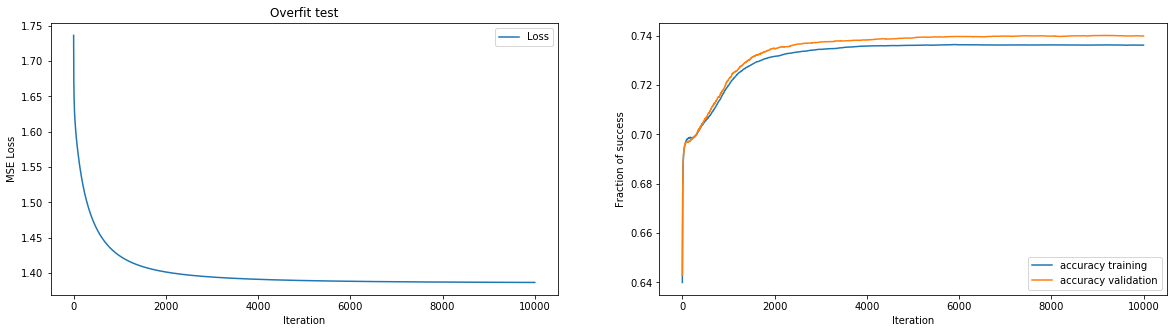

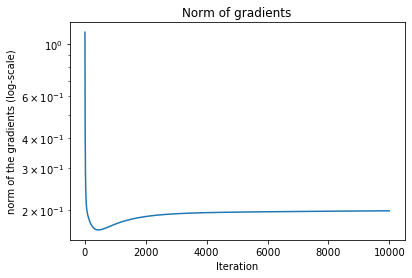

In [15]:
clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= 1e-6,
            max_iterations=10000,
            min_max_iterations = 300,
            w_sampling_distr='zero',
            threshold=1e-6,
        )
clf.train(y_train, x_train, 
        batch_size= 25000, 
        verbose = True, 
        tx_validation = x_test, 
        y_validation = y_test, 
        store_gradient=True, 
        store_losses=True,
        normalize_gradient = True)

#plotting stuff
training_plots(clf, show_gradient=True)

In [16]:
clf.get_params_and_results(x_train, x_test, y_train, y_test)

{'accuracy_train': 0.736195,
 'accuracy_test': 0.73992,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 1e-06,
  'max_iterations': 10000,
  'threshold': 1e-06,
  'weights': array([ 1.21384162e-03, -2.35258018e-02, -5.90327420e-03, -1.73319519e-03,
         -2.01060025e-04,  2.20183311e-03, -4.59614782e-04,  1.46240223e-03,
         -9.62957911e-04,  7.03228998e-03, -1.47337131e-03,  2.66094397e-03,
          3.58075197e-04,  1.86429466e-02, -8.46288789e-05, -2.87484793e-04,
          1.67154517e-03, -2.65441019e-05,  2.74440880e-04,  9.72346025e-03,
          2.00057159e-04, -1.85662844e-03, -7.83268023e-04,  1.61415112e-03,
         -6.38202224e-04, -6.21395216e-04, -1.69332248e-03,  6.94549380e-05,
         -9.60960701e-05, -1.32821581e-02]),
  'normalize_gaddient': True,
  'losses': [1.7364251375260564,
   1.7074240485666379,
   1.691334109955151,
   1.680332272357852,
   1.6722571084673068,
   1.666001216854311,
   1.6609379631937318,
  

In [17]:
batch_sizes = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
clfiers_batches = []
for b in batch_sizes:
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= 1e-6,
                max_iterations= 5000,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=1e-6,
                )
        clf.train(y_train, x_train, 
                batch_size= b, 
                verbose = False, 
                tx_validation = x_test, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)
        clfiers_batches += [clf]


<Figure size 432x288 with 0 Axes>

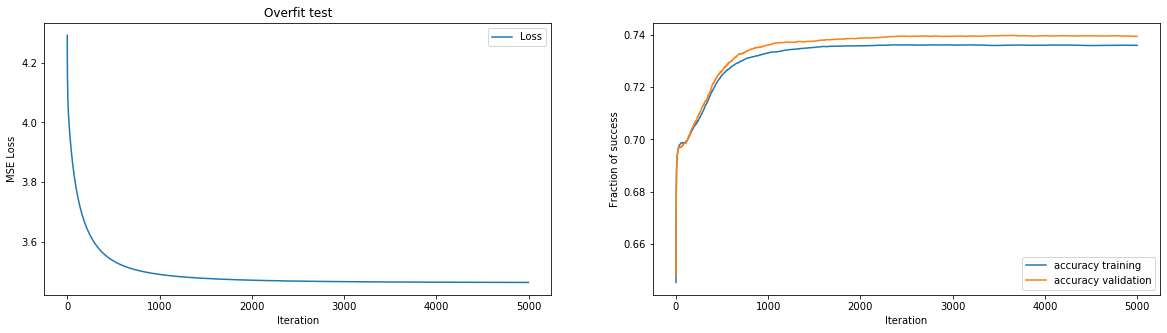

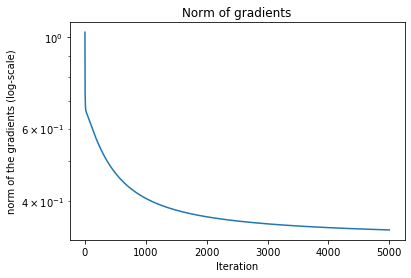

Batch size 10000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

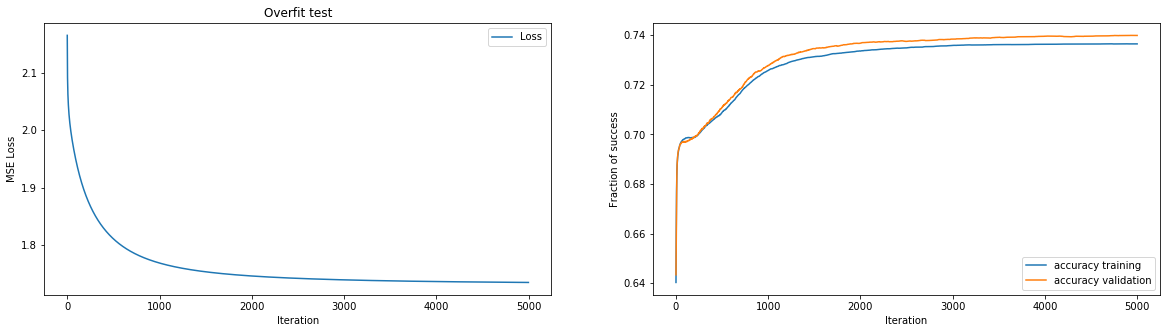

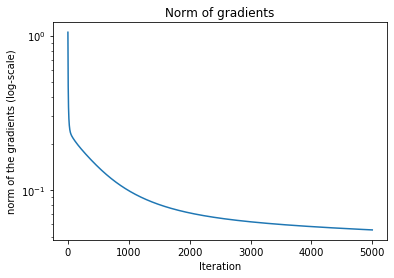

Batch size 20000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

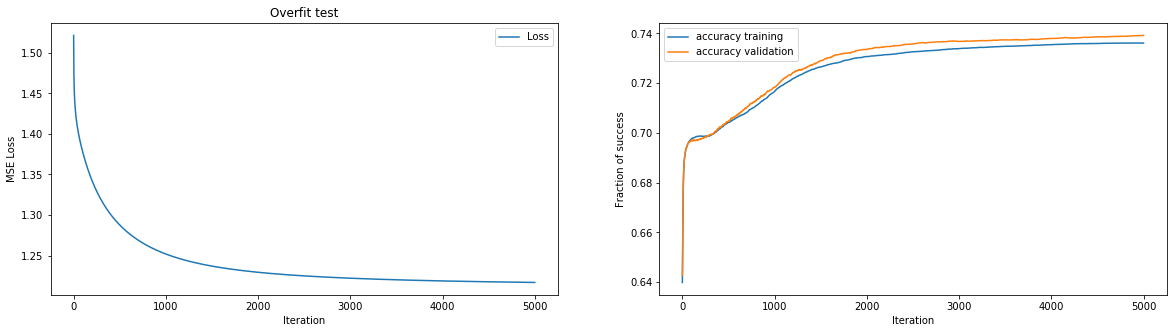

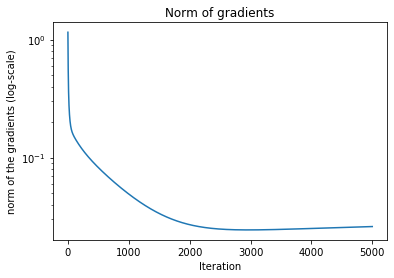

Batch size 30000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

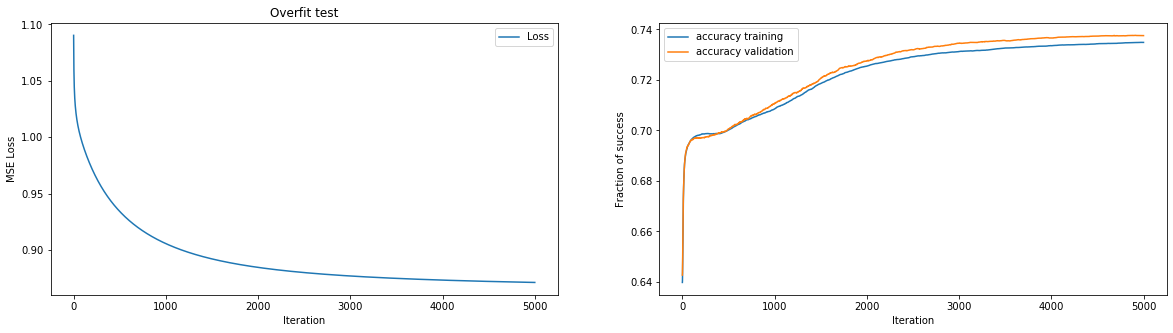

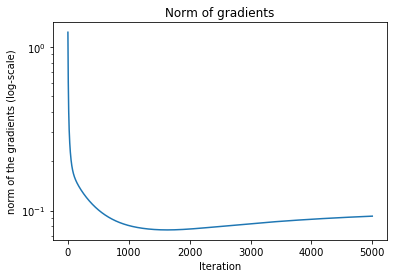

Batch size 40000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

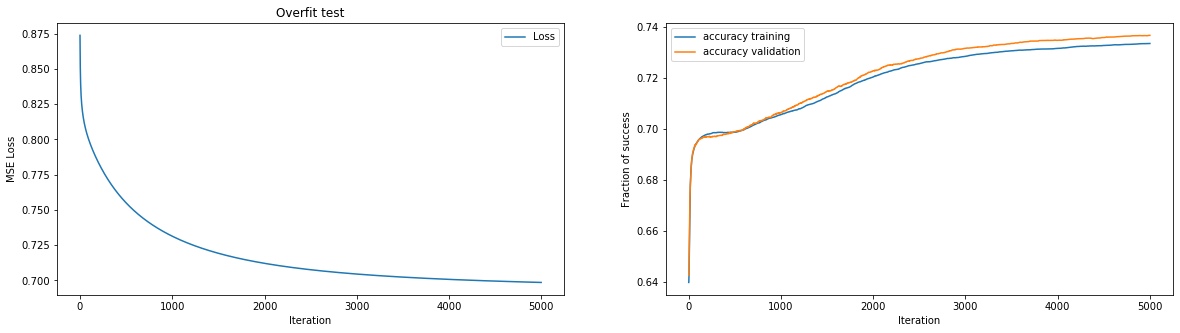

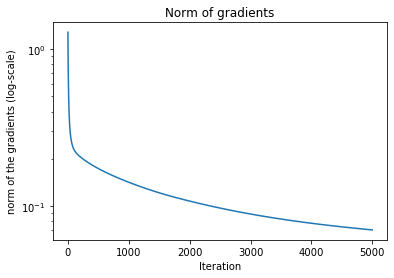

Batch size 50000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

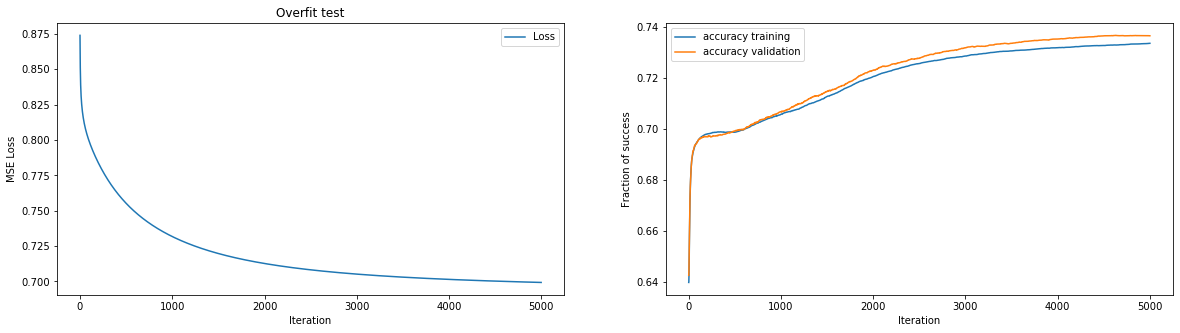

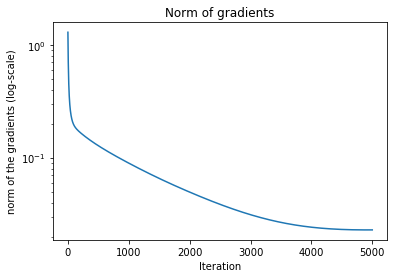

Batch size 60000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

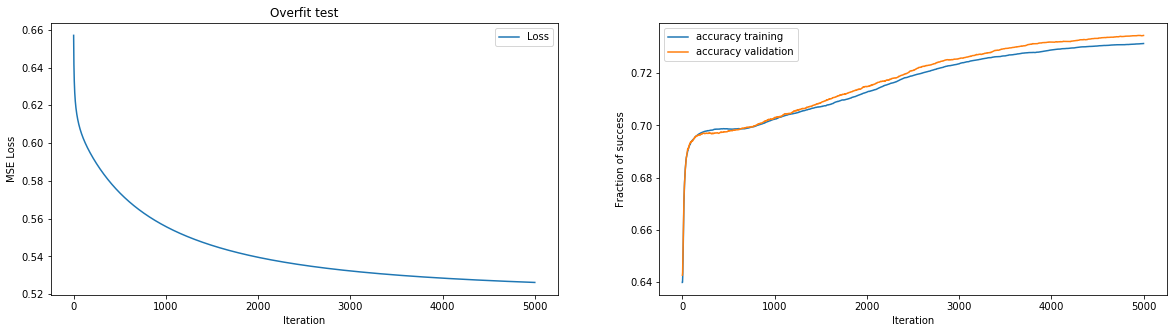

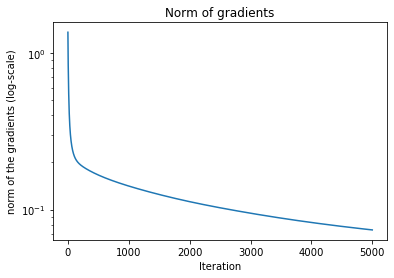

Batch size 70000 test accuracy:	 0.730985 train accuracy:	 0.7343


<Figure size 432x288 with 0 Axes>

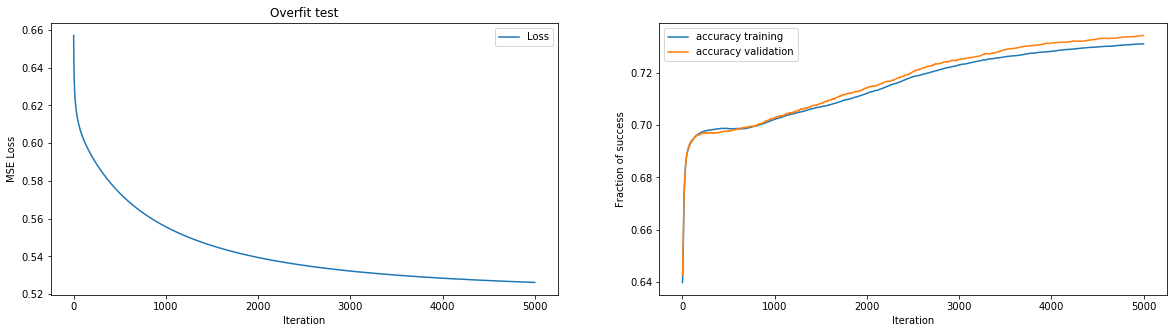

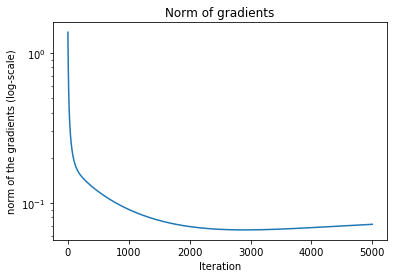

Batch size 80000 test accuracy:	 0.730985 train accuracy:	 0.7343


In [18]:
#plotting stuff
for c, b in zip(clfiers_batches, batch_sizes):
        fig = plt.figure()
        training_plots(c, show_gradient=True)
        te = clf.get_params_and_results(x_train, x_test, y_train, y_test)['accuracy_train']
        tr = clf.get_params_and_results(x_train, x_test, y_train, y_test)['accuracy_test']
        print('Batch size', b, 'test accuracy:\t', te, 'train accuracy:\t', tr)

Text(0.5, 1.0, 'Batch sizes affects the convergence of the algo')

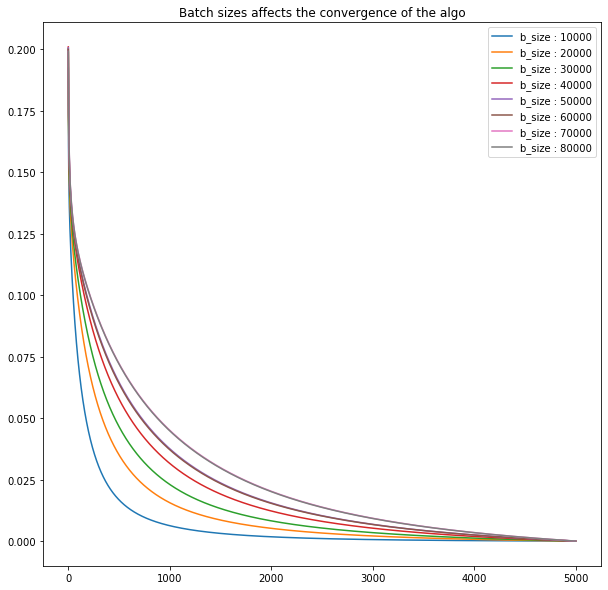

In [19]:
# different batch sizes summary plot:
#plotting stuff
fig = plt.figure(figsize=(10, 10))
for c, b in zip(clfiers_batches, batch_sizes):
        minimum = min(c.params['losses'])
        maximum = max(c.params['losses'])
        losses = c.params['losses']
        losses = (losses - minimum)/maximum
        zoom = 0
        plt.plot(zoom + np.arange(len(losses[zoom:])), losses[zoom:], label = "b_size : " +str(b))
        plt.legend()
plt.title("Batch sizes affects the convergence of the algo")

In [20]:
clfiers[0].params.keys()

dict_keys(['name', 'lambda_', 'regulairizer', 'gamma', 'max_iterations', 'threshold', 'weights', 'normalize_gaddient', 'losses', 'accuyracues_while_training_train', 'accuyracues_while_training_validation', 'stored_gradients', 'initial_w', 'w_sampling_distr'])

Text(0, 0.5, 'Accuracy on test set')

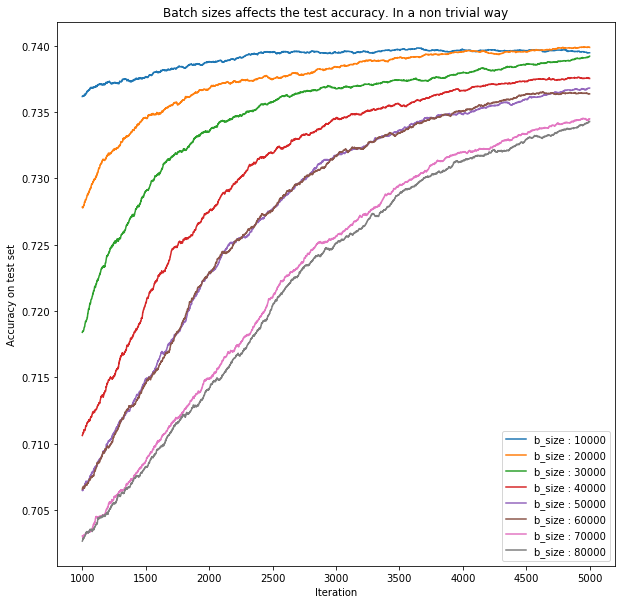

In [21]:
# different batch sizes summary plot:
#plotting stuff
fig = plt.figure(figsize=(10, 10))
for c, b in zip(clfiers_batches, batch_sizes):
        losses = c.params['accuyracues_while_training_validation']
        zoom = 1000
        plt.plot(zoom + np.arange(len(losses[zoom:])), losses[zoom:], label = "b_size : " +str(b))
        plt.legend()
plt.title("Batch sizes affects the test accuracy. In a non trivial way")
plt.xlabel("Iteration")
plt.ylabel('Accuracy on test set')

## Does the batch size affect the gamma range ? 
We don't know. Possibly yes

# Other stuff

In [ ]:
from logReg_gridSearch import *
gss = GridSearch_Simulation('../data/train.csv', '../data/test.csv') 
acc_tr, acc_te, losses_tr, losses_te  = gss.train_model(dataset, l_rate, b_size, initial_w_dist)

In [ ]:
clf.get_params_and_results(x_train, x_test, y_train, y_test)

{'accuracy_train': 0.69169,
 'accuracy_test': 0.69242,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 1e-10,
  'max_iterations': 1800,
  'threshold': 0,
  'weights': array([-0.01843706, -0.89697075, -0.02075554, -0.25920814,  0.56148697,
          0.10750221,  0.76100716,  0.20950545, -0.84842473, -0.50201431,
         -0.64809637, -0.11197115, -0.02858168,  0.7618703 , -0.90262245,
          0.6490594 ,  0.01546187,  0.32066341,  0.90402211, -0.23952832,
          0.57396276,  0.59472485, -0.56803769,  0.2199465 ,  0.16666141,
         -0.39056725, -0.95293877, -0.18431507, -0.24476245, -0.0511362 ]),
  'losses': [0.3781970988869389,
   0.37807129908995385,
   0.37795257231070273,
   0.3778489728012784,
   0.37772177647440797,
   0.37759532768977855,
   0.3775162505757743,
   0.3774361555566297,
   0.3773128746056228,
   0.37718437439426333,
   0.3770480658670966,
   0.3768968469250383,
   0.3767073682217996,
   0.37651822200518603,
   0.3